
These days I'm playing a simple but interesting [Pokemon with stats](https://www.kaggle.com/abcsds/pokemon/data) dataset. Unexpectedlly,the `seaborn` and `matplotlib` do not support the radar chart. And the [matplotlib radar chart sample](https://matplotlib.org/examples/api/radar_chart.html) is totally a mass (**186 lines**, what the hell). After an afternoon's work I implemented the radar chart in a much simple way (only **20 lines**). Hope this blog could help someone who is try to draw the radar chart in Python. 
(Or time to change to R? ;P)

# Preparation 

As usual, load the libraries and data. Then use the `df.head()` to view the structure of the dataset.

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("./data/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Draw the Radar Chart

After we know our dataset, it's time to draw the radar now. We want to show the **'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'** as 6 different axes on our radar chart, so just take them out and set as a `np.array`. Here we use the No.386 pokemon as an example to illustrate the chart. 

In [3]:
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=df.loc[386,labels].values

Set the angle of polar axis. And here we need to use the `np.concatenate` to draw a closed plot in radar chart. 

In [4]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

Here we should use the `fig.add_subplot` rather than the `sns.plt.subplots()`.(notice the "s"). Because the `subplots` doesn't contain the argument "polar". We can only set the polar axis by `subplot`.  

Then draw the plot as the frame and fill in the surrounded area by `fill()`. At the end set the label of axis and the title then everything done. Here you go ;)

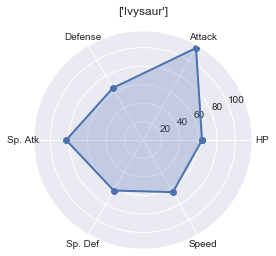

In [6]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([df.loc[1,"Name"]])
ax.grid(True)